# Decision Trees and Random Forests



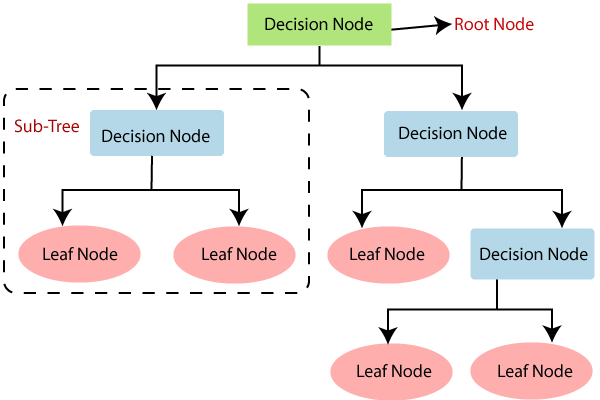

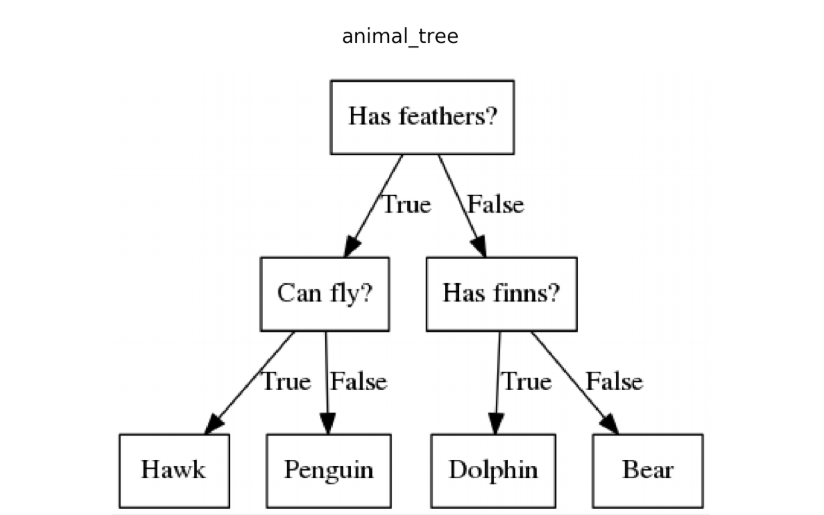

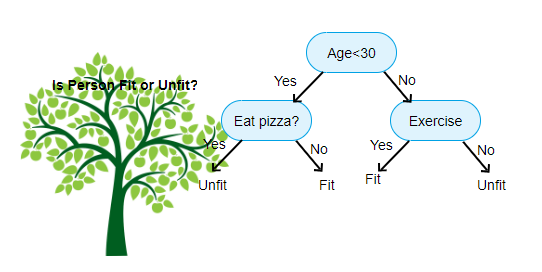

The following topics are covered :

- Downloading a real-world dataset
- Preparing a dataset for training
- Training and interpreting decision trees
- Training and interpreting random forests
- Overfitting, hyperparameter tuning & regularization
- Making predictions on single inputs



## Problem Statement

> **QUESTION**: The [Rain in Australia dataset](https://kaggle.com/jsphyg/weather-dataset-rattle-package) contains about 10 years of daily weather observations from numerous Australian weather stations. Here's a small sample from the dataset:
> 
> ![](https://i.imgur.com/5QNJvir.png)
>
> As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow. 
>
>
> ![](https://i.imgur.com/KWfcpcO.png)


Let's install and import some required libraries before we begin.

In [ ]:
#restart the kernel after installation
!pip install pandas-profiling numpy matplotlib seaborn --quiet

In [ ]:
!pip install opendatasets scikit-learn  --quiet --upgrade

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Downloading the Data

The dataset is available at https://www.kaggle.com/jsphyg/weather-dataset-rattle-package .


We'll use the [`opendatasets` library](https://github.com/JovianML/opendatasets) to download the data from Kaggle directly within Jupyter. 

In [ ]:
raw_df = pd.read_csv('/content/weatherAUS.csv')

In [ ]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32892,2015-10-07,Sydney,19.7,21.5,0.0,13.2,1.3,SSW,67.0,SSE,SE,39.0,26.0,61.0,56.0,1029.6,1033.6,5.0,7.0,20.3,19.0,No,No
32893,2015-10-08,Sydney,17.0,21.1,0.0,6.6,2.2,ENE,35.0,ESE,E,13.0,20.0,53.0,57.0,1038.8,1036.0,7.0,7.0,18.5,19.9,No,No
32894,2015-10-09,Sydney,16.8,22.7,0.0,5.4,8.7,ENE,43.0,N,NE,15.0,24.0,51.0,51.0,1034.4,1029.7,7.0,5.0,20.1,22.0,No,No
32895,2015-10-10,Sydney,15.7,24.3,0.0,6.8,9.5,E,24.0,SE,E,2.0,17.0,62.0,60.0,1028.9,1025.8,1.0,4.0,21.2,22.3,No,No


Each row shows the measurements for a given date at a given location. The last column "RainTomorrow" contains the value to be predicted.

Let's check the column types of the dataset.

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32897 entries, 0 to 32896
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           32897 non-null  object 
 1   Location       32897 non-null  object 
 2   MinTemp        32398 non-null  float64
 3   MaxTemp        32527 non-null  float64
 4   Rainfall       32210 non-null  float64
 5   Evaporation    13825 non-null  float64
 6   Sunshine       9380 non-null   float64
 7   WindGustDir    28030 non-null  object 
 8   WindGustSpeed  28034 non-null  float64
 9   WindDir9am     28429 non-null  object 
 10  WindDir3pm     30797 non-null  object 
 11  WindSpeed9am   32068 non-null  float64
 12  WindSpeed3pm   31422 non-null  float64
 13  Humidity9am    32231 non-null  float64
 14  Humidity3pm    31567 non-null  float64
 15  Pressure9am    26213 non-null  float64
 16  Pressure3pm    26217 non-null  float64
 17  Cloud9am       17086 non-null  float64
 18  Cloud3



Let's drop any rows where the value of the target column `RainTomorrow` in empty.

In [ ]:
raw_df.dropna(subset=['RainTomorrow'], inplace=True)

> **EXERCISE**: Perform exploratory data analysis on the dataset and study the relationship of other columns with the `RainTomorrow` column.

## Preparing the Data for Training

We'll perform the following steps to prepare the dataset for training:

1. Create a train/test/validation split
2. Identify input and target columns
3. Identify numeric and categorical columns
4. Impute (fill) missing numeric values
5. Scale numeric values to the $(0, 1)$ range
6. Encode categorical columns to one-hot vectors

### Training, Validation and Test Sets

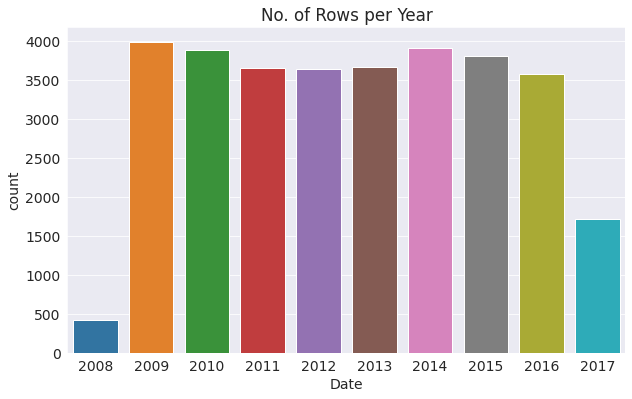

In [ ]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

## to_datetime: Convert argument to datetime. This function converts a scalar, array-like, Series or DataFrame /dict-like to a pandas datetime object. The object to convert to a datetime.

While working with chronological data, it's often a good idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.

We'll use the data till 2014 for the training set, data from 2015 for the validation set, and the data from 2016 & 2017 for the test set.  

In [ ]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (23130, 23)
val_df.shape : (3798, 23)
test_df.shape : (5282, 23)


> **EXERCISE**: Scrape the climate data for the available 14 months from http://www.bom.gov.au/climate/data and train the model using the first 12 months data, validate using the 13th-month data, and test on the 14th-month data. 

### Input and Target Columns

Let's identify the input and target columns.

In [ ]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

Let's also identify the numeric and categorical columns.

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


> **EXERCISE**: Study how various columns are correlated with the target and select just a subset of the columns, instead of all of the. Observe how it affects the results.

In [ ]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32891,2015-10-06,Sydney,20.3,32.3,0.0,8.6,11.4,NNE,43.0,WNW,ENE,15.0,17.0,37.0,26.0,1023.2,1019.7,1.0,1.0,23.8,30.6,No,No
32892,2015-10-07,Sydney,19.7,21.5,0.0,13.2,1.3,SSW,67.0,SSE,SE,39.0,26.0,61.0,56.0,1029.6,1033.6,5.0,7.0,20.3,19.0,No,No
32893,2015-10-08,Sydney,17.0,21.1,0.0,6.6,2.2,ENE,35.0,ESE,E,13.0,20.0,53.0,57.0,1038.8,1036.0,7.0,7.0,18.5,19.9,No,No
32894,2015-10-09,Sydney,16.8,22.7,0.0,5.4,8.7,ENE,43.0,N,NE,15.0,24.0,51.0,51.0,1034.4,1029.7,7.0,5.0,20.1,22.0,No,No


1. **IMPUTATION MISSING VALUES**

In [ ]:
train_inputs[numeric_cols].isna().sum()

MinTemp            239
MaxTemp            116
Rainfall           248
Evaporation      11843
Sunshine         14727
WindGustSpeed     3488
WindSpeed9am       525
WindSpeed3pm       553
Humidity9am        273
Humidity3pm        327
Pressure9am       4483
Pressure3pm       4485
Cloud9am         10431
Cloud3pm         10420
Temp9am            216
Temp3pm            270
dtype: int64

In [ ]:
train_inputs[numeric_cols].isna().sum().sort_values(ascending=False)

Sunshine         14727
Evaporation      11843
Cloud9am         10431
Cloud3pm         10420
Pressure3pm       4485
Pressure9am       4483
WindGustSpeed     3488
WindSpeed3pm       553
WindSpeed9am       525
Humidity3pm        327
Humidity9am        273
Temp3pm            270
Rainfall           248
MinTemp            239
Temp9am            216
MaxTemp            116
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean').fit(raw_df[numeric_cols])

In [ ]:
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])

In [ ]:
val_inputs[numeric_cols]= imputer.transform(val_inputs[numeric_cols])

In [ ]:
test_inputs[numeric_cols]= imputer.transform(test_inputs[numeric_cols])

In [ ]:
test_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

**2. SCALING NUMERIC FEATURES**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])

In [ ]:
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

In [ ]:
train_inputs.describe().loc[['min','max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.000000,0.034568,0.0,0.00000,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007444
max,0.991304,1.000000,1.0,0.75174,1.0,0.8125,0.638462,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.980149


**3. ENCODING CATEGORICAL DATA**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown="ignore").fit(raw_df[categorical_cols])

What is sparse matrix with example?

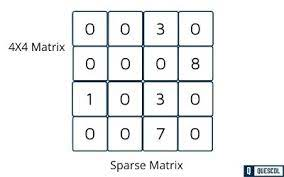

The matrix which has a greater number of zero values in comparison to the non-zero values is known as a sparse matrix. In the above example we have 4 X 4 matrix where only 5 values are non-zero and rest of the value are zero. So if we calculate the space. Integer value takes 2 bytes.

In [ ]:
 categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
encoded_cols =list(encoder.get_feature_names(categorical_cols))
encoded_cols

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['Location_Albury',
 'Location_BadgerysCreek',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Moree',
 'Location_Newcastle',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Penrith',
 'Location_Richmond',
 'Location_Sydney',
 'WindGustDir_E',
 'WindGustDir_ENE',
 'WindGustDir_ESE',
 'WindGustDir_N',
 'WindGustDir_NE',
 'WindGustDir_NNE',
 'WindGustDir_NNW',
 'WindGustDir_NW',
 'WindGustDir_S',
 'WindGustDir_SE',
 'WindGustDir_SSE',
 'WindGustDir_SSW',
 'WindGustDir_SW',
 'WindGustDir_W',
 'WindGustDir_WNW',
 'WindGustDir_WSW',
 'WindGustDir_nan',
 'WindDir9am_E',
 'WindDir9am_ENE',
 'WindDir9am_ESE',
 'WindDir9am_N',
 'WindDir9am_NE',
 'WindDir9am_NNE',
 'WindDir9am_NNW',
 'WindDir9am_NW',
 'WindDir9am_S',
 'WindDir9am_SE',
 'WindDir9am_SSE',
 'WindDir9am_SSW',
 'WindDir9am_SW',
 'WindDir9am_W',
 'WindDir9am_WNW',
 'WindDir9am_WSW',
 'WindDir9am_nan',
 'WindDir3pm_E',
 'WindDir3pm_ENE',
 'WindDir3pm_ESE',
 'WindDir3pm_N',
 'WindDir3pm_NE',
 'WindDir3pm_NNE',
 'Win

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])

In [ ]:
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

In [ ]:
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]

In [ ]:
X_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
X_val = val_inputs[numeric_cols + encoded_cols]

In [ ]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Albury,Location_BadgerysCreek,Location_Cobar,Location_CoffsHarbour,Location_Moree,Location_Newcastle,Location_NorahHead,Location_NorfolkIsland,Location_Penrith,Location_Richmond,Location_Sydney,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
0,0.527536,0.397531,0.001617,0.065002,0.544551,0.289062,0.153846,0.289157,0.701031,0.212121,0.457912,0.486159,0.888889,0.55226,0.443850,0.382134,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.353623,0.451852,0.000000,0.065002,0.544551,0.289062,0.030769,0.265060,0.422680,0.242424,0.506734,0.498270,0.478582,0.55226,0.451872,0.444169,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.513043,0.466667,0.000000,0.065002,0.544551,0.304688,0.146154,0.313253,0.360825,0.292929,0.456229,0.513841,0.478582,0.25000,0.553476,0.416873,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.405797,0.523457,0.000000,0.065002,0.544551,0.132812,0.084615,0.108434,0.432990,0.151515,0.624579,0.584775,0.478582,0.55226,0.475936,0.498759,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.646377,0.629630,0.002695,0.065002,0.544551,0.265625,0.053846,0.240964,0.814433,0.323232,0.510101,0.467128,0.777778,1.00000,0.467914,0.578164,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32608,0.684058,0.367901,0.000000,0.122970,0.000000,0.187500,0.084615,0.180723,0.484536,0.525253,0.681818,0.719723,0.777778,0.87500,0.542781,0.354839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32609,0.686957,0.429630,0.000000,0.046404,0.142857,0.179688,0.015385,0.156627,0

**TRAINING AND VISUALIZING DEISION TREES**



**ML model will decide WHat is right criteria and decision to best fit the model?** 


**1. Training**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state = 42)

In [ ]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=42)

In [ ]:
train_preds= model.predict(X_train)

In [ ]:
pd.value_counts(train_preds)

No     18069
Yes     5061
dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

2. **EVALUATION**


**`1. ACCURACY SCORE`on X-train**

In [ ]:
accuracy_score(train_preds, train_targets)

0.999913532209252

**2. Probability Prediction for Accuracy Score**

In [ ]:
train_probs= model.predict_proba(X_train)

In [ ]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

3. **Accuracy Score on X_val**

In [ ]:
model.score(X_val,val_targets)

0.7617166929963138

**It appears that the model has learned the training examples perfect, and doesn't generalize well to previously unseen examples. This phenomenon is called "overfitting", and reducing overfitting is one of the most important parts of any machine learning project.**

**3. VISUALIZATION**

In [ ]:
from sklearn.tree import plot_tree, export_text

[Text(0.5, 0.875, 'Humidity3pm <= 0.712\ngini = 0.342\nsamples = 23130\nvalue = [18067, 5063]'),
 Text(0.25, 0.625, 'Humidity3pm <= 0.51\ngini = 0.227\nsamples = 19069\nvalue = [16575, 2494]'),
 Text(0.125, 0.375, 'WindGustSpeed <= 0.236\ngini = 0.119\nsamples = 10989\nvalue = [10289, 700]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Rainfall <= 0.006\ngini = 0.345\nsamples = 8080\nvalue = [6286, 1794]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.823\ngini = 0.465\nsamples = 4061\nvalue = [1492, 2569]'),
 Text(0.625, 0.375, 'RainToday_Yes <= 0.5\ngini = 0.498\nsamples = 2285\nvalue = [1222, 1063]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Humidity3pm <= 0.904\ngini = 0.258\nsamples = 1776\nvalue = [270, 1506]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

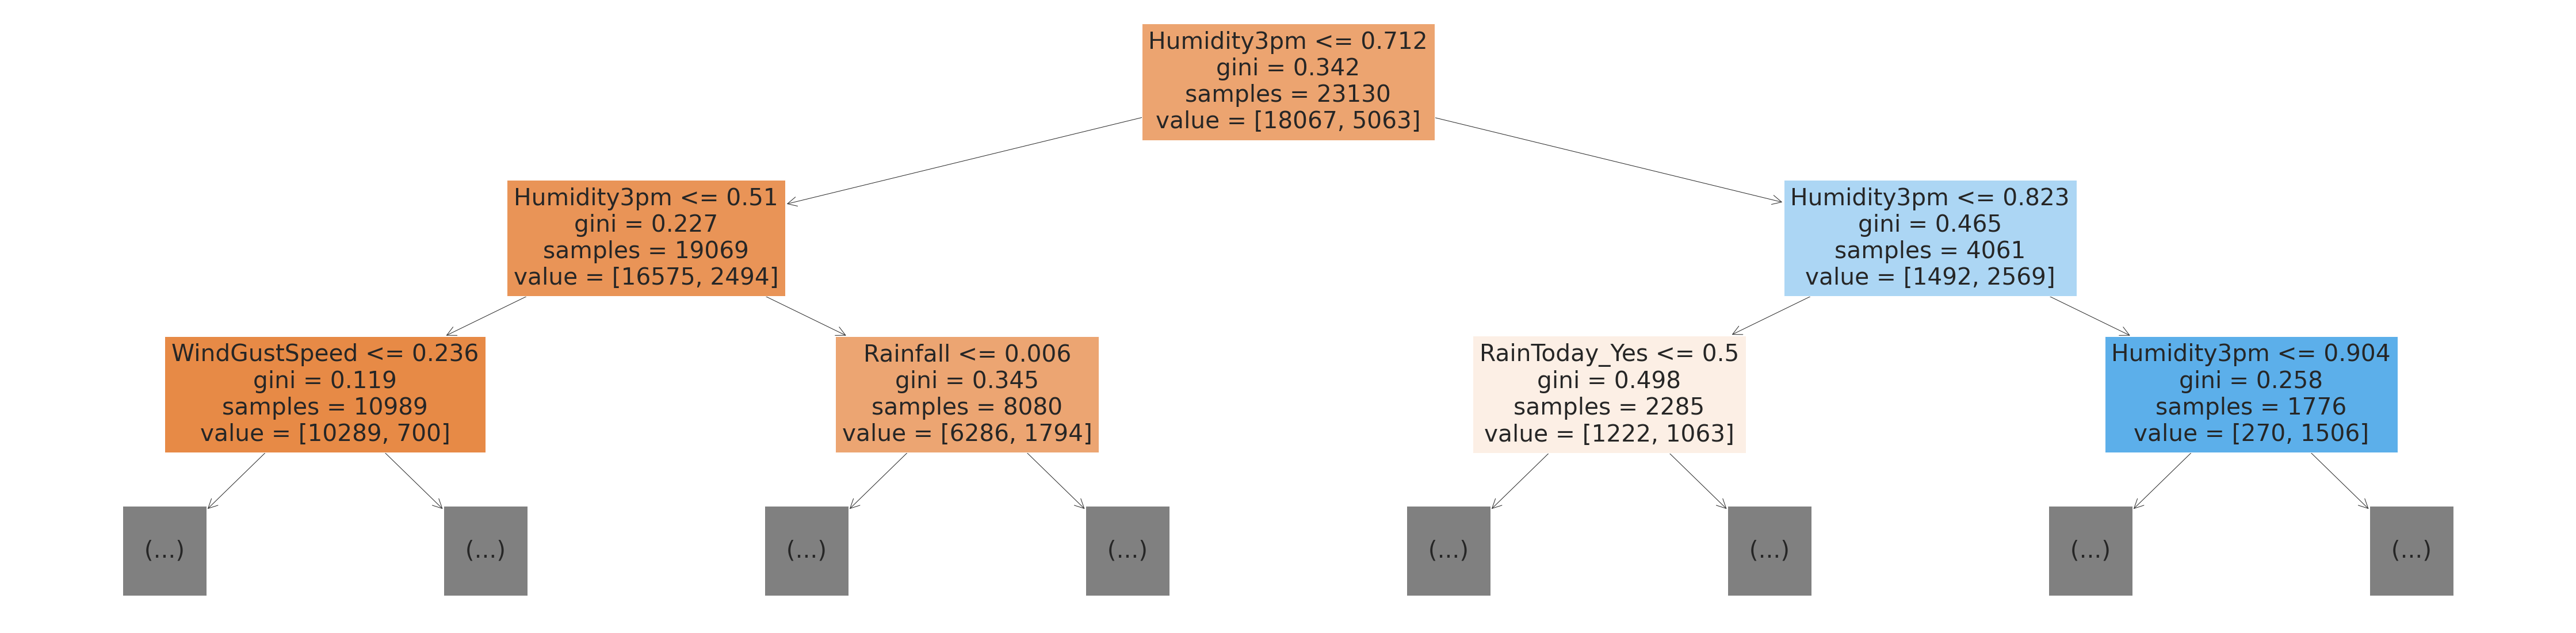

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model, max_depth = 2, feature_names= X_train.columns, filled=True)

In [ ]:
model.tree_.max_depth

36

In [ ]:
tree_text = export_text (model,max_depth =10,feature_names=list(X_train.columns))

In [ ]:
print(tree_text[:5000])


|--- Humidity3pm <= 0.71
|   |--- Humidity3pm <= 0.51
|   |   |--- WindGustSpeed <= 0.24
|   |   |   |--- Humidity3pm <= 0.44
|   |   |   |   |--- Rainfall <= 0.09
|   |   |   |   |   |--- Sunshine <= 0.31
|   |   |   |   |   |   |--- Sunshine <= 0.29
|   |   |   |   |   |   |   |--- Pressure3pm <= 0.81
|   |   |   |   |   |   |   |   |--- WindDir9am_SSE <= 0.50
|   |   |   |   |   |   |   |   |   |--- WindGustSpeed <= 0.23
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- WindGustSpeed >  0.23
|   |   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.14
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.14
|   |   |   |   |   |   |   |   |   |   |   |

# **Hyperparameter Tuning and Overfitting**
As we saw in the previous section, our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was only marginally better than a dumb baseline model. This phenomenon is called overfitting, and in this section, we'll look at some strategies for reducing overfitting. The process of reducing overfitting is known as regularlization.

The DecisionTreeClassifier accepts several arguments, some of which can be modified to reduce overfitting.

In [ ]:
model = DecisionTreeClassifier(max_depth=3, random_state = 42)

In [ ]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
model.score(X_train, train_targets)

0.8423259835711198

In [ ]:
model.score(X_val, val_targets)

0.806477093206951

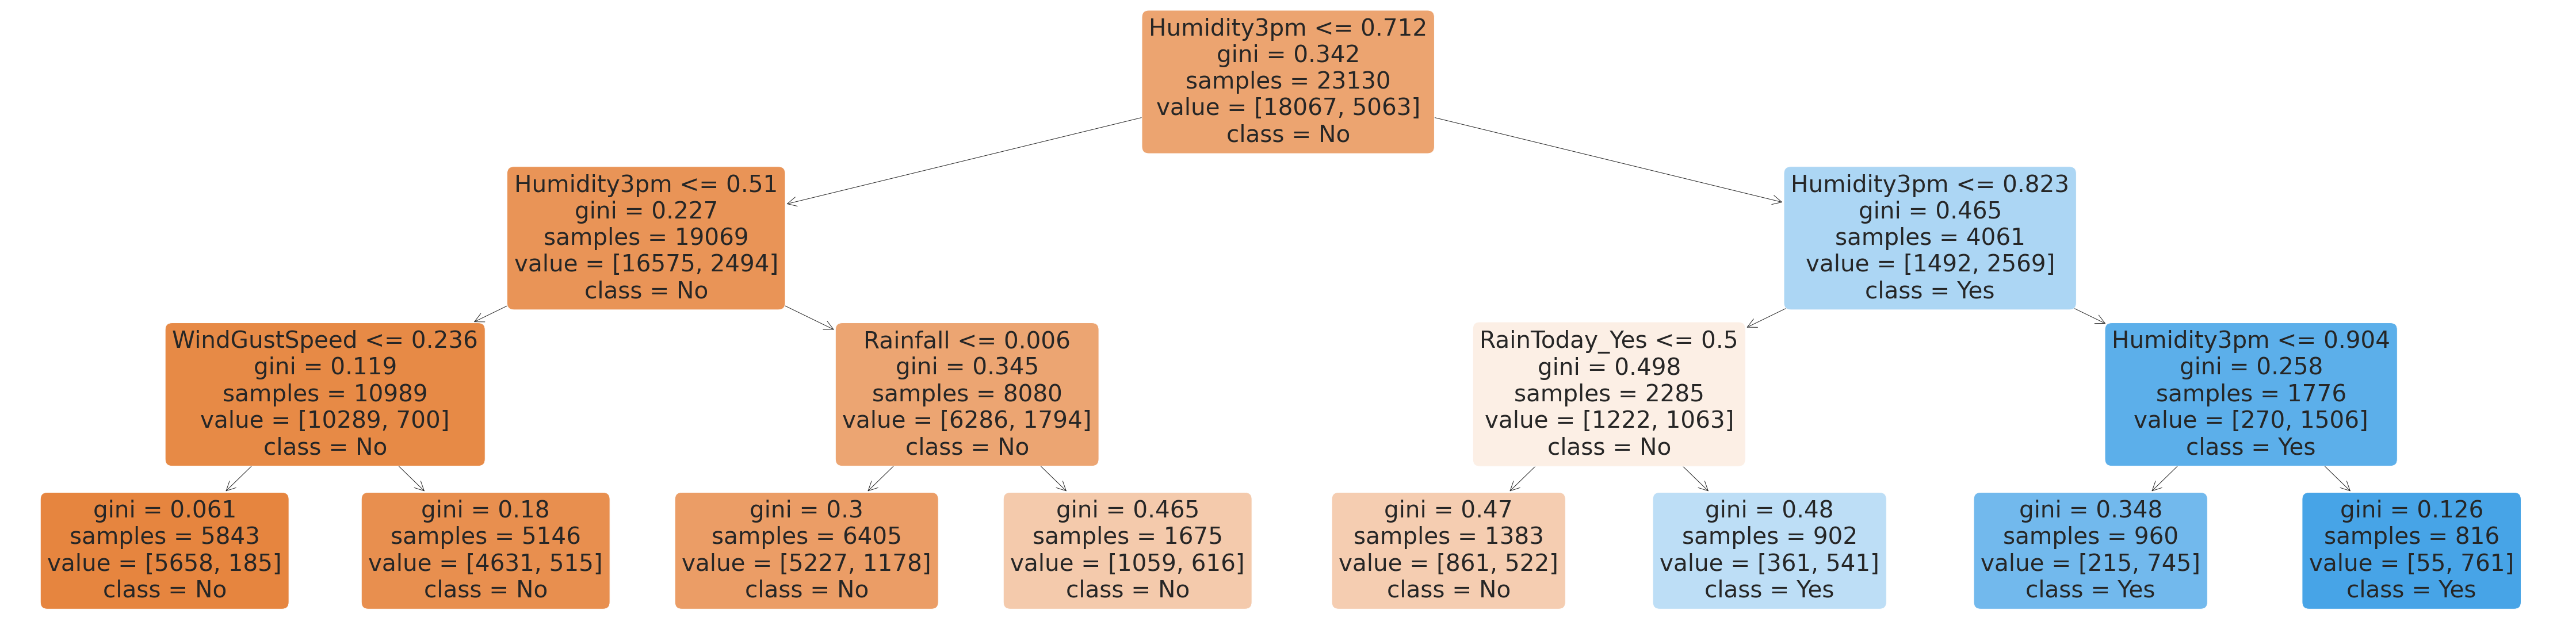

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [ ]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- Humidity3pm <= 0.71
|   |--- Humidity3pm <= 0.51
|   |   |--- WindGustSpeed <= 0.24
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.24
|   |   |   |--- class: No
|   |--- Humidity3pm >  0.51
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: No
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: No
|--- Humidity3pm >  0.71
|   |--- Humidity3pm <= 0.82
|   |   |--- RainToday_Yes <= 0.50
|   |   |   |--- class: No
|   |   |--- RainToday_Yes >  0.50
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Humidity3pm <= 0.90
|   |   |   |--- class: Yes
|   |   |--- Humidity3pm >  0.90
|   |   |   |--- class: Yes

